In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load dataset
df = pd.read_csv("hospital_readmissions.csv")

In [ ]:
# Clean column names
df.columns = [col.strip() for col in df.columns]

# Convert target to numeric
df['readmitted'] = df['readmitted'].map({'yes':1, 'no':0})

print("Dataset shape:", df.shape)
print("\nColumn info:\n", df.info())
print("\nMissing values:\n", df.isnull().sum())

Dataset shape: (25000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted   

/tmp/ipython-input-2424329711.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='readmitted', data=df, palette="Set2")


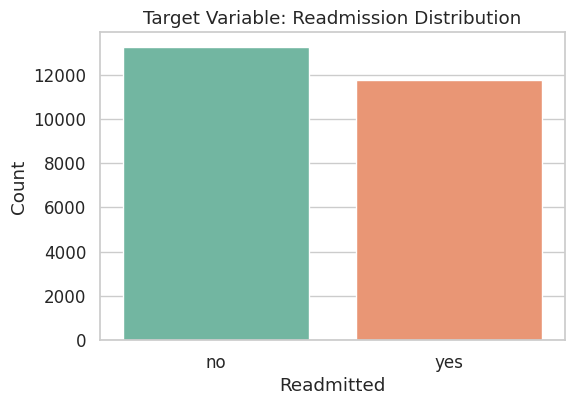

In [ ]:
# -------------------------------
# 1. Target Variable
# -------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='readmitted', data=df, palette="Set2")
plt.title("Target Variable: Readmission Distribution")
plt.xlabel("Readmitted")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-2524471926.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[0], palette="muted")


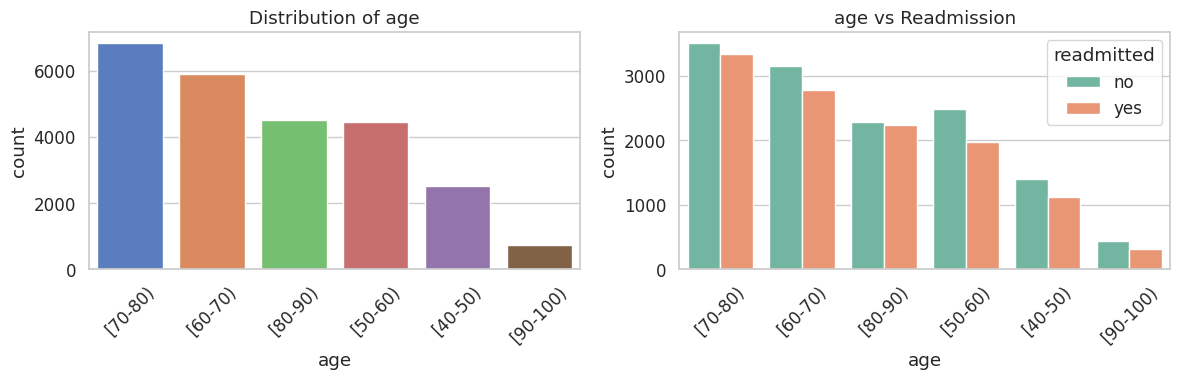

In [ ]:
# -------------------------------
# 2. Demographics
# -------------------------------
demo_cols = ['age']
for col in demo_cols:
    fig, axes = plt.subplots(1,2, figsize=(12,4))

    # Distribution
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[0], palette="muted")
    axes[0].set_title(f"Distribution of {col}")
    axes[0].tick_params(axis='x', rotation=45)

    # vs Target
    sns.countplot(x=col, data=df, hue='readmitted', order=df[col].value_counts().index, ax=axes[1], palette="Set2")
    axes[1].set_title(f"{col} vs Readmission")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-775933393.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted', y=col, data=df, ax=axes[1], palette="Set2")


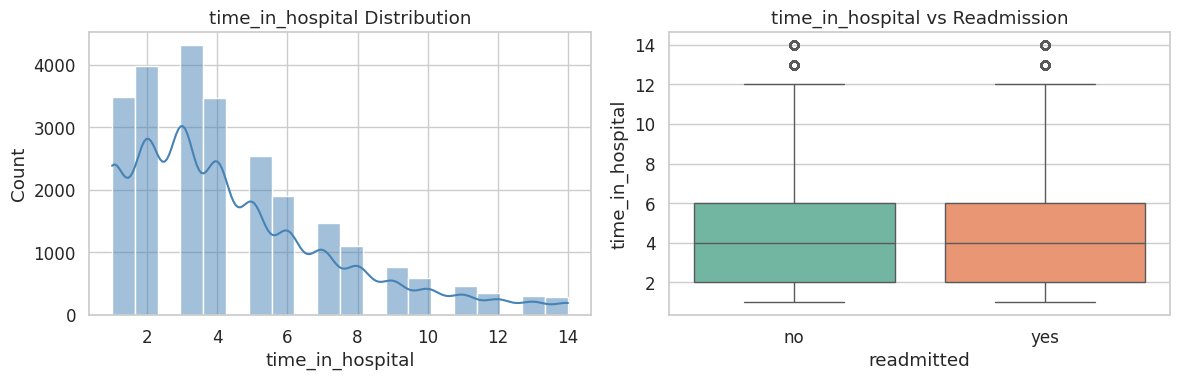

/tmp/ipython-input-775933393.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted', y=col, data=df, ax=axes[1], palette="Set2")


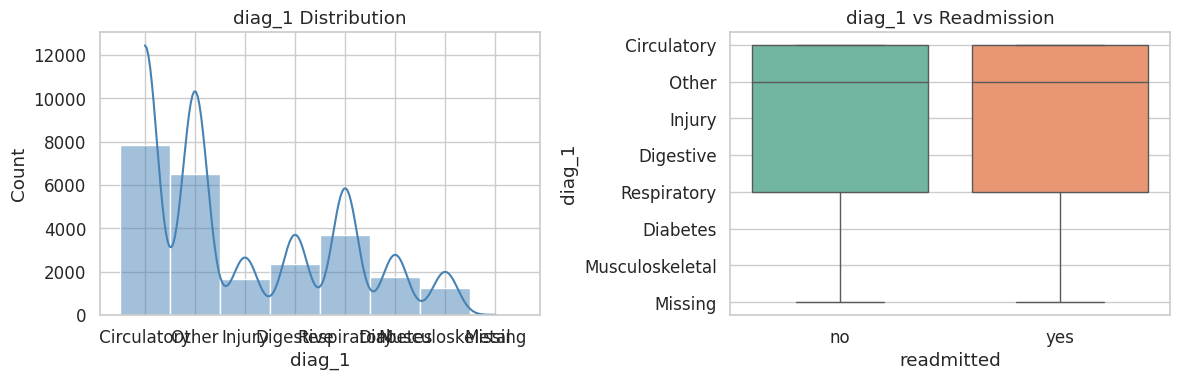

/tmp/ipython-input-775933393.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted', y=col, data=df, ax=axes[1], palette="Set2")


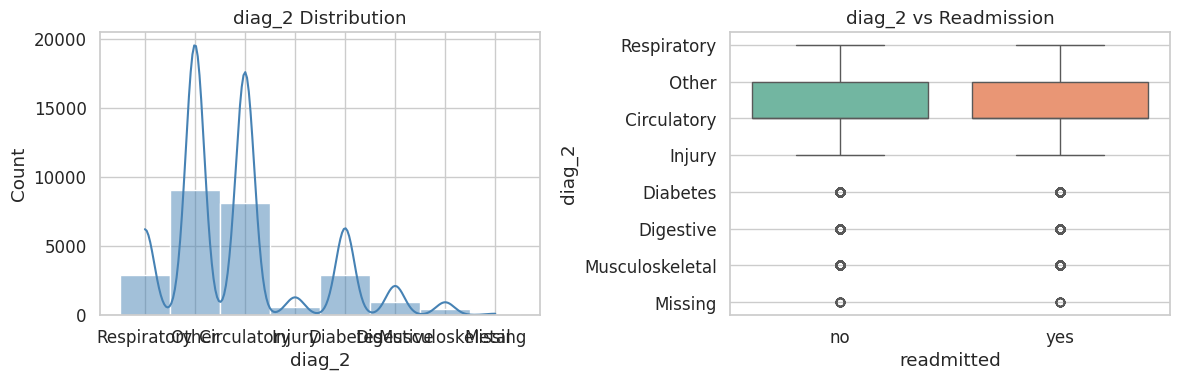

/tmp/ipython-input-775933393.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted', y=col, data=df, ax=axes[1], palette="Set2")


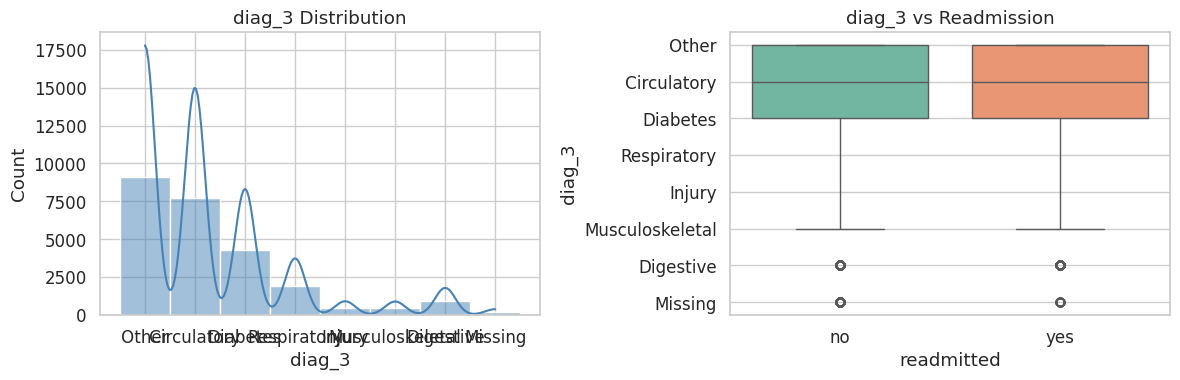

In [ ]:

# -------------------------------
# 3. Hospitalization Info
# -------------------------------
num_cols = ['time_in_hospital', 'diag_1', 'diag_2', 'diag_3']
for col in num_cols:
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    sns.histplot(df[col], bins=20, kde=True, ax=axes[0], color="steelblue")
    axes[0].set_title(f"{col} Distribution")

    sns.boxplot(x='readmitted', y=col, data=df, ax=axes[1], palette="Set2")
    axes[1].set_title(f"{col} vs Readmission")
    plt.tight_layout()
    plt.show()

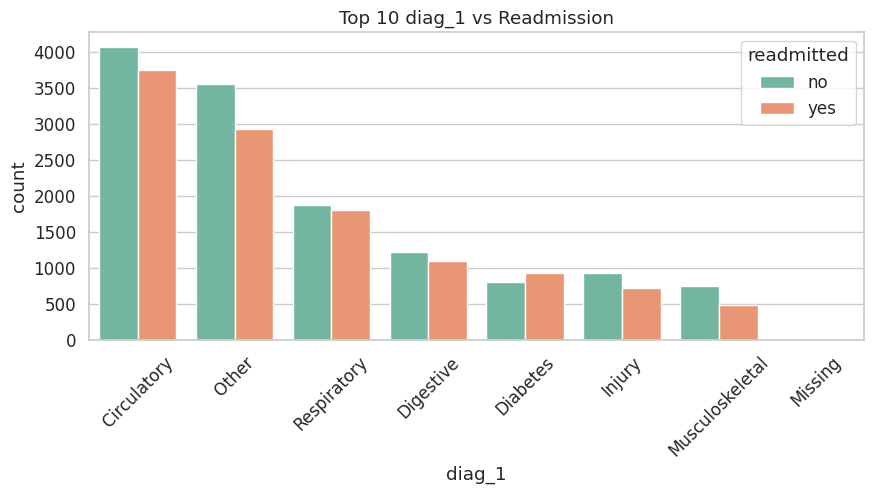

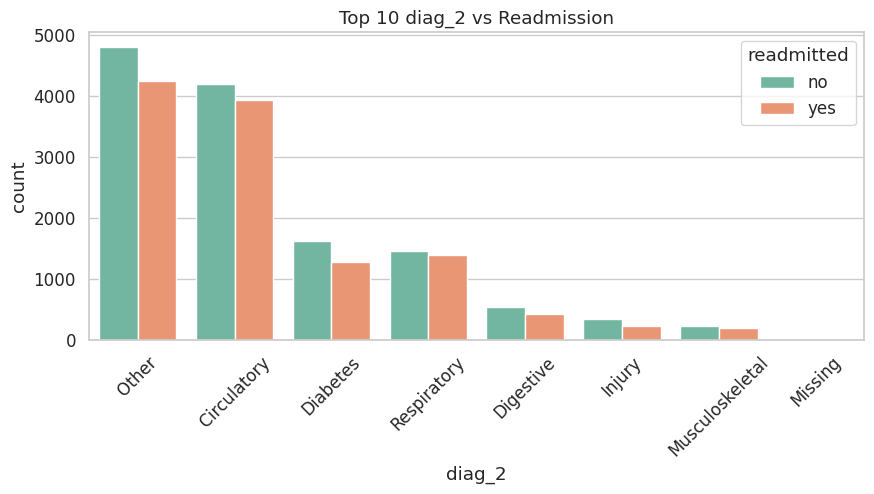

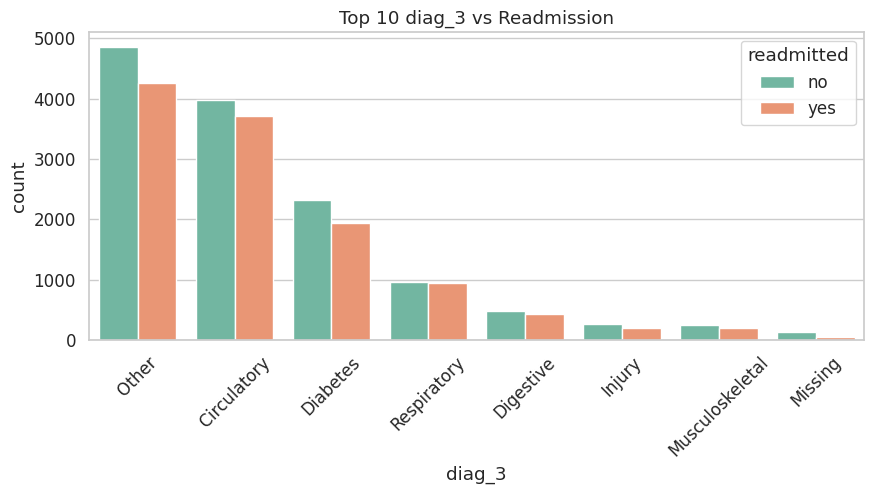

In [ ]:
# -------------------------------
# 4. Clinical Info (Diagnoses)
# -------------------------------
for col in ['diag_1', 'diag_2', 'diag_3']:
    plt.figure(figsize=(10,4))
    top10 = df[col].value_counts().nlargest(10).index
    sns.countplot(x=col, data=df[df[col].isin(top10)], hue='readmitted', palette="Set2",
                  order=top10)
    plt.title(f"Top 10 {col} vs Readmission")
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipython-input-2004439342.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y=col, data=df, ax=axes[1], palette="Set2")


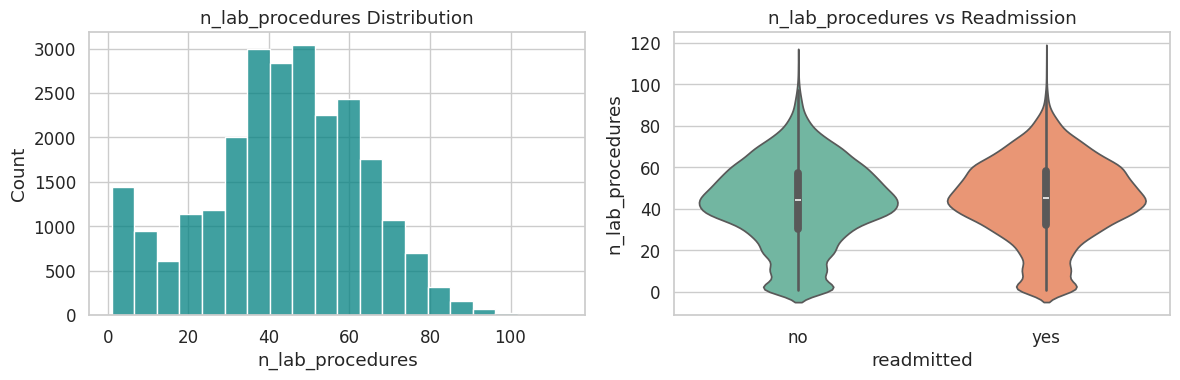

/tmp/ipython-input-2004439342.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y=col, data=df, ax=axes[1], palette="Set2")


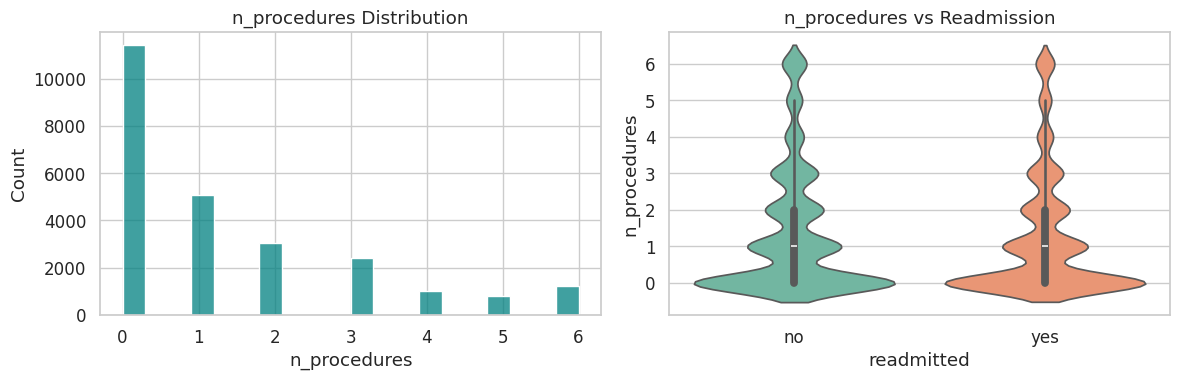

/tmp/ipython-input-2004439342.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y=col, data=df, ax=axes[1], palette="Set2")


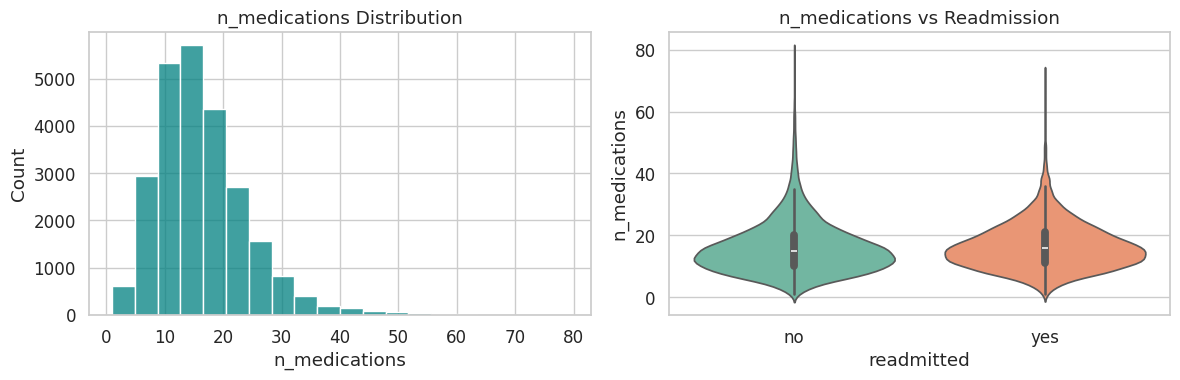

/tmp/ipython-input-2004439342.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y=col, data=df, ax=axes[1], palette="Set2")


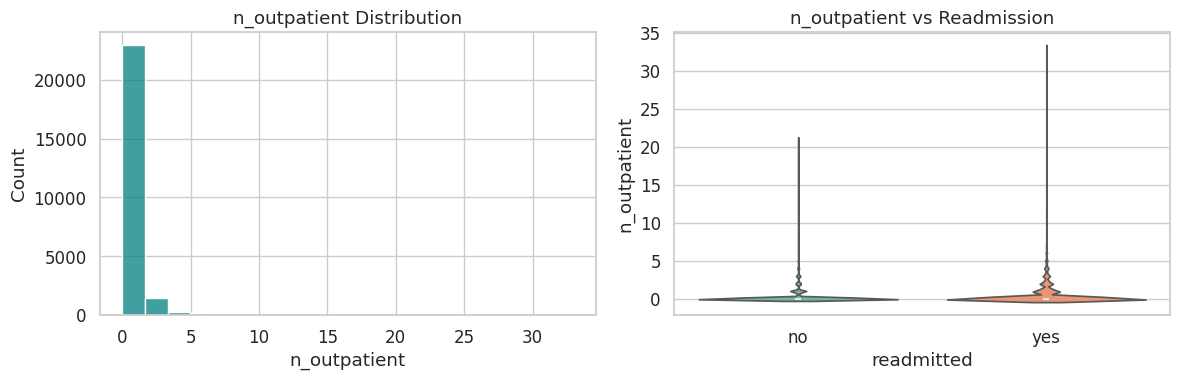

/tmp/ipython-input-2004439342.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y=col, data=df, ax=axes[1], palette="Set2")


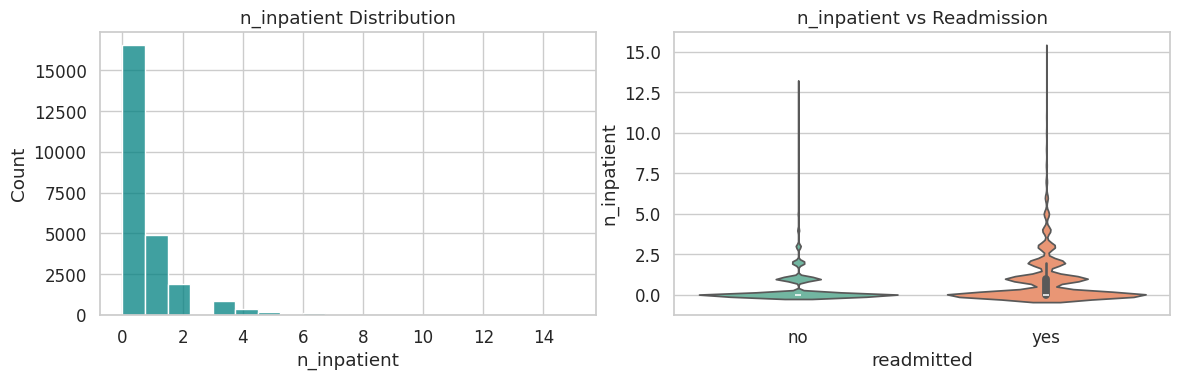

/tmp/ipython-input-2004439342.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y=col, data=df, ax=axes[1], palette="Set2")


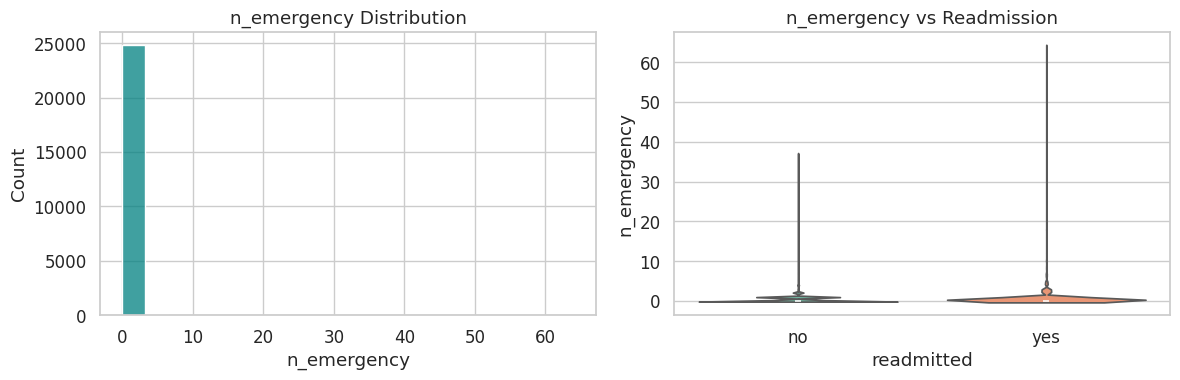

In [ ]:
# -------------------------------
# 5. Labs, Procedures, Medications
# -------------------------------
proc_cols = ['n_lab_procedures', 'n_procedures', 'n_medications',
             'n_outpatient', 'n_inpatient', 'n_emergency']

for col in proc_cols:
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    sns.histplot(df[col], bins=20, kde=False, ax=axes[0], color="teal")
    axes[0].set_title(f"{col} Distribution")

    sns.violinplot(x='readmitted', y=col, data=df, ax=axes[1], palette="Set2")
    axes[1].set_title(f"{col} vs Readmission")
    plt.tight_layout()
    plt.show()

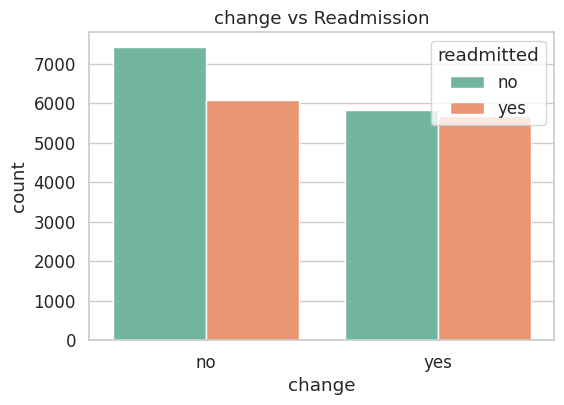

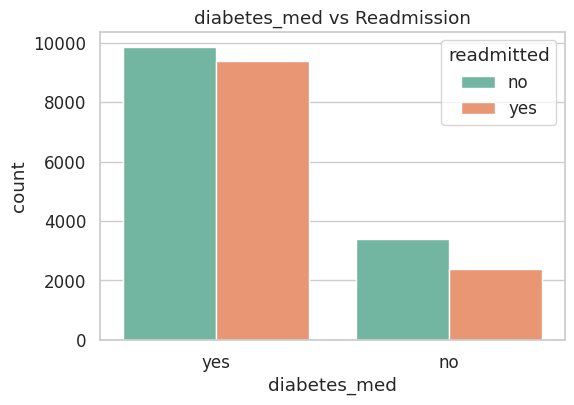

In [ ]:
# -------------------------------
# 6. Medications & Treatment
# -------------------------------
for col in ['change', 'diabetes_med']:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, hue='readmitted', palette="Set2")
    plt.title(f"{col} vs Readmission")
    plt.show()

In [ ]:
# Example drug columns (subset - adjust as per dataset)
#drug_cols = ['metformin', 'insulin', 'glipizide']
#if all(c in df.columns for c in drug_cols):
#    plt.figure(figsize=(8,4))
#    drug_data = df[drug_cols].apply(lambda x: x.value_counts()).fillna(0)
#    sns.heatmap(drug_data, annot=True, cmap="Blues", fmt=".0f")
#    plt.title("Drug Usage Counts")
#    plt.show()

/tmp/ipython-input-1114826318.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top15.index, y=top15.values, palette="muted")


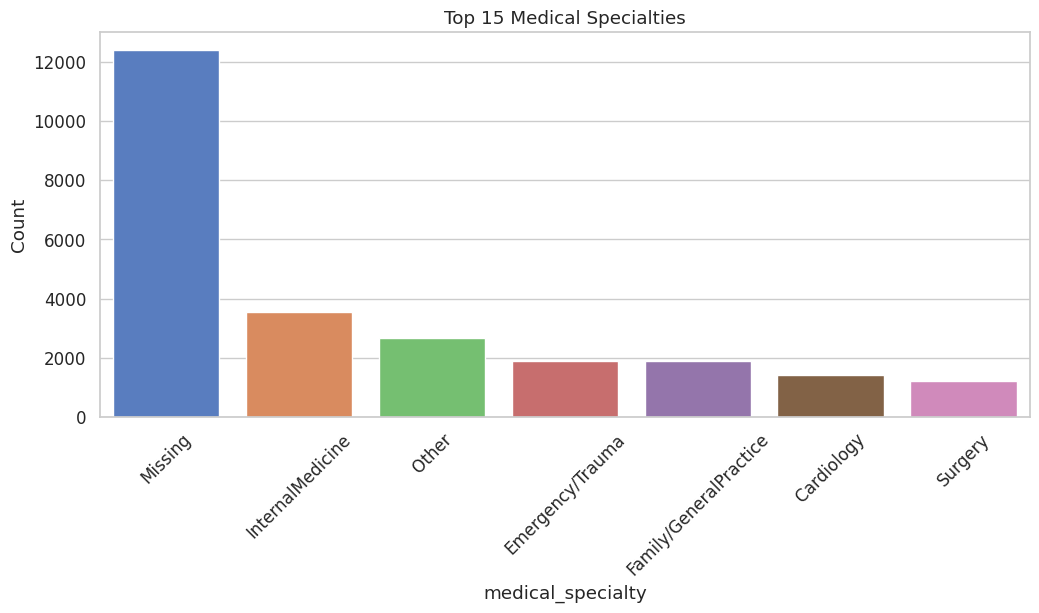

In [ ]:
# -------------------------------
# 7. Other Attributes
# -------------------------------
if 'medical_specialty' in df.columns:
    plt.figure(figsize=(12,5))
    top15 = df['medical_specialty'].value_counts().nlargest(15)
    sns.barplot(x=top15.index, y=top15.values, palette="muted")
    plt.xticks(rotation=45)
    plt.title("Top 15 Medical Specialties")
    plt.ylabel("Count")
    plt.show()

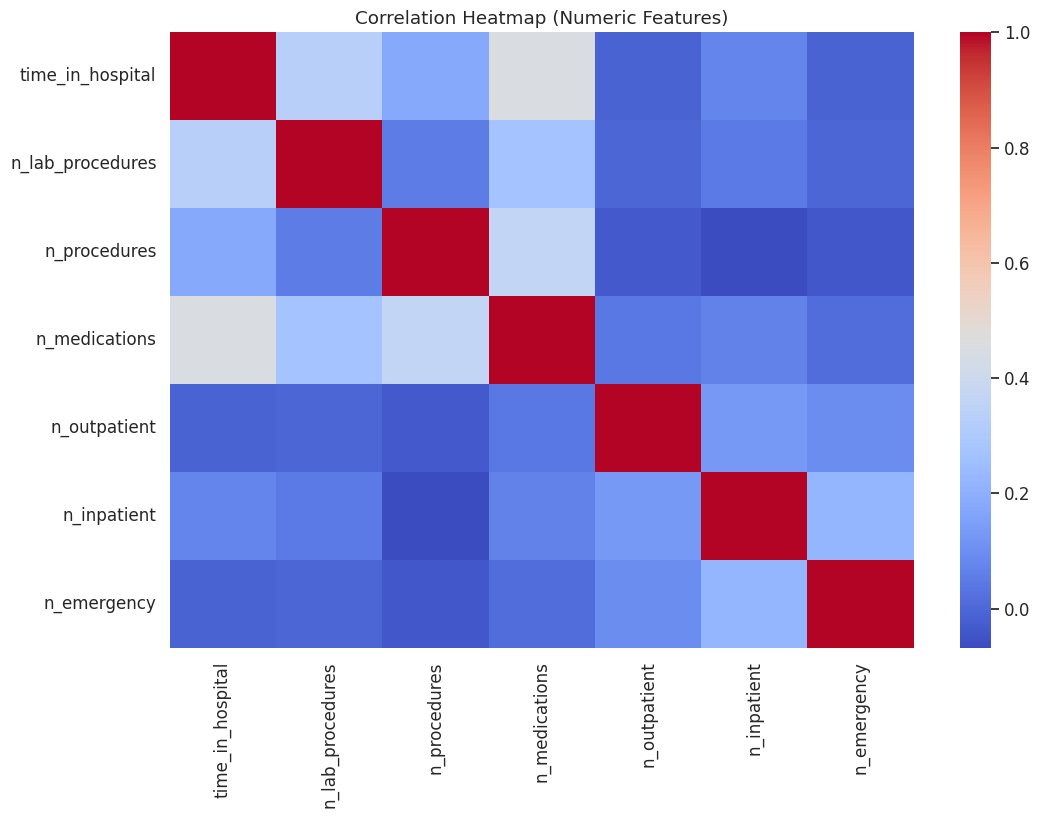

In [ ]:
# -------------------------------
# 8. Correlation Heatmap (Numerics)
# -------------------------------
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, cbar=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [ ]:
# Count of each category in readmission
counts = df['readmitted'].value_counts()
percentages = df['readmitted'].value_counts(normalize=True) * 100

print("Readmission Distribution:")
print(counts)
print("\nPercentages:")
print(percentages.round(2))


Readmission Distribution:
readmitted
no     13246
yes    11754
Name: count, dtype: int64

Percentages:
readmitted
no     52.98
yes    47.02
Name: proportion, dtype: float64


/tmp/ipython-input-2000735695.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=positive_corr.values, y=positive_corr.index, palette="Reds_r")


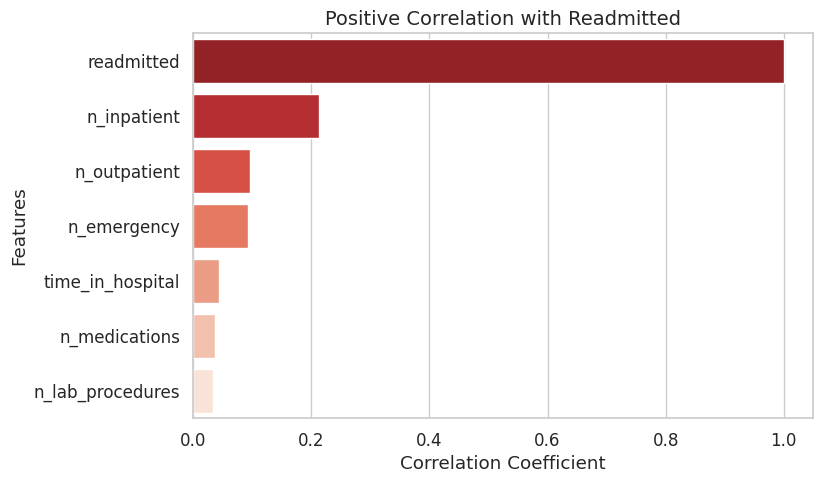

/tmp/ipython-input-2000735695.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negative_corr.values, y=negative_corr.index, palette="Blues")


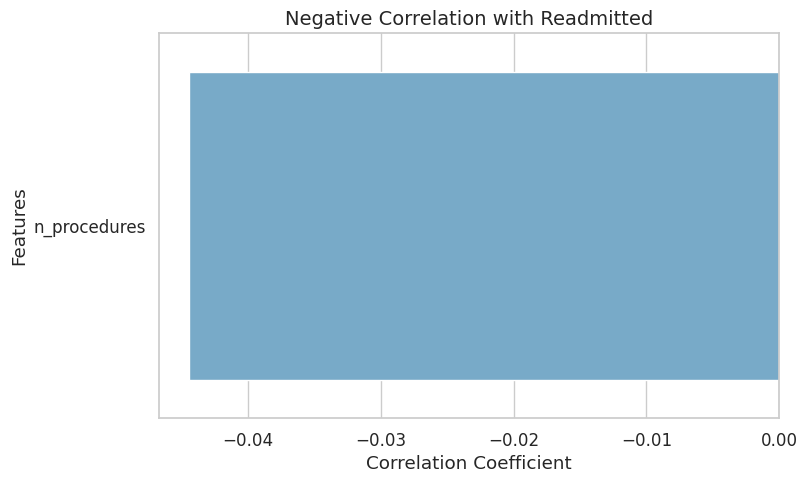

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("hospital_readmissions.csv")

# Convert categorical target to numeric (yes=1, no=0)
df['readmitted'] = df['readmitted'].map({'yes': 1, 'no': 0})

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Correlation of features with target 'readmitted'
target_corr = corr_matrix['readmitted'].sort_values()

# Separate positive and negative correlations
positive_corr = target_corr[target_corr > 0].sort_values(ascending=False)
negative_corr = target_corr[target_corr < 0].sort_values()

# -------- Positive Correlation Plot --------
plt.figure(figsize=(8, 5))
sns.barplot(x=positive_corr.values, y=positive_corr.index, palette="Reds_r")
plt.title("Positive Correlation with Readmitted", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

# -------- Negative Correlation Plot --------
plt.figure(figsize=(8, 5))
sns.barplot(x=negative_corr.values, y=negative_corr.index, palette="Blues")
plt.title("Negative Correlation with Readmitted", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import io
from scipy.stats import chi2_contingency, pointbiserialr
from sklearn.preprocessing import LabelEncoder

# ==============================================================================
# 1. LOAD YOUR DATA
# ==============================================================================
# This uses the sample CSV data you provided.
# In your real project, replace this section with:
# df = pd.read_csv('your_file_name.csv')


# ==============================================================================
# 2. PREPROCESS THE DATA
# ==============================================================================
# Drop columns that are not useful for prediction
if 'index' in df.columns:
    df = df.drop(columns=['index'])
if 'patient_id' in df.columns:
    df = df.drop(columns=['patient_id'])

# Encode the target variable 'readmitted' into numbers (e.g., 'no' -> 0, 'yes' -> 1)
le = LabelEncoder()
df['readmitted_encoded'] = le.fit_transform(df['readmitted'])


# ==============================================================================
# 3. HELPER FUNCTION FOR CRAMÉR'S V (Categorical vs. Categorical)
# ==============================================================================
def cramers_v(x, y):
    """
    Calculates Cramér's V for association between two categorical variables.
    This function includes a bias correction for more accurate results.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    if min((kcorr - 1), (rcorr - 1)) == 0:
        return 0
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


# ==============================================================================
# 4. CALCULATE AND DISPLAY THE ASSOCIATION FOR EACH FEATURE
# ==============================================================================
target_variable = 'readmitted'
target_variable_encoded = 'readmitted_encoded'
features = df.columns.drop([target_variable, target_variable_encoded])

print(f"Association of Each Feature with '{target_variable.upper()}':\n")

association_results = []

for col in features:
    if pd.api.types.is_numeric_dtype(df[col]):
        # --- For Numeric Features: Use Point-Biserial Correlation ---
        # This measures the linear relationship between a numeric and a binary variable.
        # The result is between -1 and +1.
        # It handles cases where a column has no variance (all same values).
        if df[col].nunique() > 1:
            corr, _ = pointbiserialr(df[col], df[target_variable_encoded])
        else:
            corr = 0.0 # No correlation if there's no variance

        association_results.append({
            'Feature': col,
            'Type': 'Numeric',
            'Association': corr,
            'Method': 'Point-Biserial'
        })

    else:
        # --- For Categorical Features: Use Cramér's V ---
        # This measures the strength of association between two categorical variables.
        # The result is between 0 and 1.
        cramer_val = cramers_v(df[col], df[target_variable])
        association_results.append({
            'Feature': col,
            'Type': 'Categorical',
            'Association': cramer_val,
            'Method': "Cramér's V"
        })

# Create a DataFrame from the results for clean printing
results_df = pd.DataFrame(association_results)

# --- Print the final results table ---
print(results_df.to_string(index=False))


Association of Each Feature with 'READMITTED':

          Feature        Type  Association         Method
              age Categorical     0.041852     Cramér's V
 time_in_hospital     Numeric     0.043141 Point-Biserial
 n_lab_procedures     Numeric     0.032970 Point-Biserial
     n_procedures     Numeric    -0.044467 Point-Biserial
    n_medications     Numeric     0.036871 Point-Biserial
     n_outpatient     Numeric     0.095487 Point-Biserial
      n_inpatient     Numeric     0.212480 Point-Biserial
      n_emergency     Numeric     0.093519 Point-Biserial
medical_specialty Categorical     0.056397     Cramér's V
           diag_1 Categorical     0.055826     Cramér's V
           diag_2 Categorical     0.032335     Cramér's V
           diag_3 Categorical     0.039388     Cramér's V
     glucose_test Categorical     0.015170     Cramér's V
          A1Ctest Categorical     0.022651     Cramér's V
           change Categorical     0.042669     Cramér's V
     diabetes_med Catego